<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87856 entries, 0 to 87855
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                87856 non-null  object
 1   Geographic Region   87856 non-null  object
 2   Platform            87856 non-null  object
 3   Marketing Channel   87856 non-null  object
 4   Visits              87856 non-null  int64 
 5   Qualified Shoppers  87856 non-null  int64 
 6   Bounced Visits      87856 non-null  int64 
 7   Gross Orders        87856 non-null  int64 
 8   Net Orders          87856 non-null  int64 
 9   Net Room Nights     87856 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 6.7+ MB


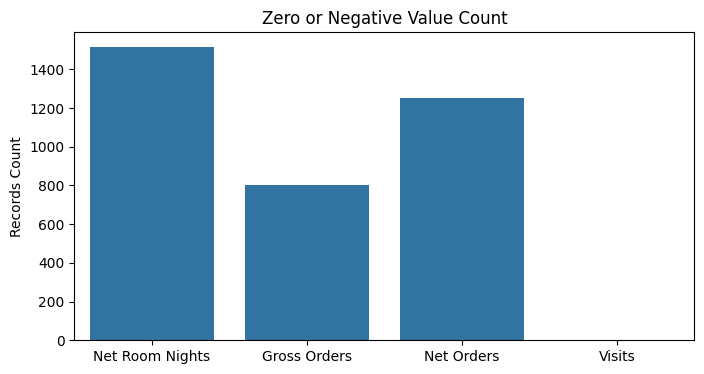

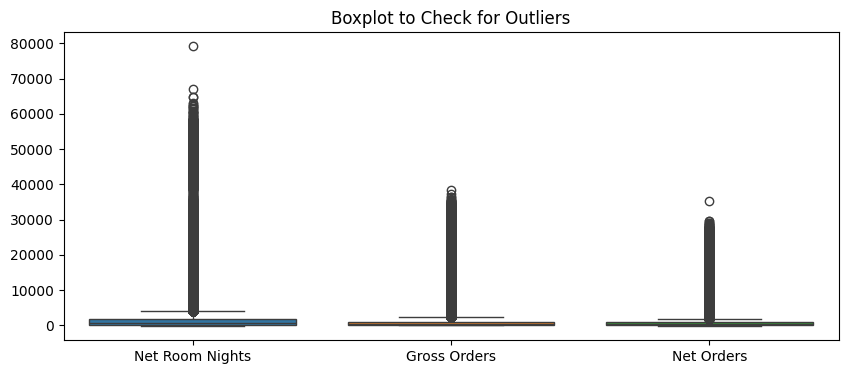

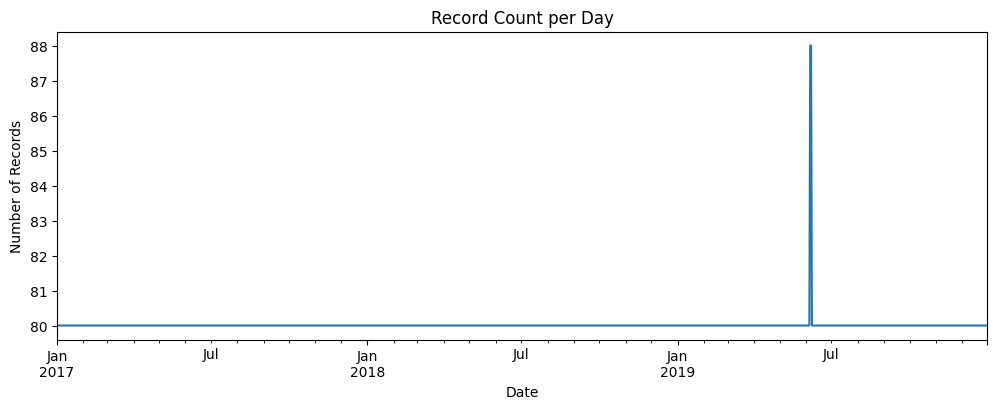

Cleaned dataset shape: (87616, 17)
        Date Geographic Region Platform Marketing Channel  Visits  \
0 2017-01-01      Geo Region 1  Desktop         Channel 1    3011   
1 2017-01-01      Geo Region 1  Desktop         Channel 2  119684   
2 2017-01-01      Geo Region 1  Desktop         Channel 3   25612   
3 2017-01-01      Geo Region 1  Desktop         Channel 4    3115   
4 2017-01-01      Geo Region 1  Desktop         Channel 5    5657   

   Qualified Shoppers  Bounced Visits  Gross Orders  Net Orders  \
0                1878             811          1139         957   
1               82504           26541         12489       10369   
2               11828            7398          1399        1139   
3                1463            1393            69          50   
4                4307            1346           641         517   

   Net Room Nights    Month  DayOfWeek  IsWeekend         Day Weekday Quarter  \
0             1848  2017-01          6       True  2017-01-01  Sun

In [ ]:
# Data Cleansing for dataset
# 1. Load Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv("/content/HCOM_Analytics_Insights_Case_Study_Dataset.csv")

# ----`Data Information ------
df.info()
df.describe()

# Step 1: Remove rows with invalid dates
df = df[pd.to_datetime(df['Date'], errors='coerce').notna()].copy()


# Step 2: Remove duplicate rows
df = df.drop_duplicates()

# Step 3: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Columns to check
numeric_columns = ['Visits', 'Qualified Shoppers', 'Bounced Visits', 'Gross Orders', 'Net Orders', 'Net Room Nights']

# Check for zero or negative values
zero_negative_summary = {
    col: {
        "Zero Values": (df[col] == 0).sum(),
        "Negative Values": (df[col] < 0).sum()
    } for col in numeric_columns
}

# Zero or negative values
zero_neg_counts = {
    col: (df[col] <= 0).sum()
    for col in ['Net Room Nights', 'Gross Orders', 'Net Orders', 'Visits']
    if col in df.columns
}

plt.figure(figsize=(8, 4))
sns.barplot(x=list(zero_neg_counts.keys()), y=list(zero_neg_counts.values()))
plt.title('Zero or Negative Value Count')
plt.ylabel('Records Count')
plt.show()

# 3. Outliers via boxplots
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['Net Room Nights', 'Gross Orders', 'Net Orders']])
plt.title('Boxplot to Check for Outliers')
plt.show()

# 4. Date coverage check
df['Date'] = pd.to_datetime(df['Date'])
daily_counts = df.groupby('Date').size()

plt.figure(figsize=(12, 4))
daily_counts.plot()
plt.title('Record Count per Day')
plt.ylabel('Number of Records')
plt.show()

# Create derived COLUMNS ---
df['Month'] = df['Date'].dt.to_period('M')
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6])
df["Day"] = df["Date"].dt.date
df["Weekday"] = df["Date"].dt.day_name()
df["Quarter"] = df["Date"].dt.to_period("Q").astype(str)
df["Year"] = df["Date"].dt.year

# View dataframe schema
print("Cleaned dataset shape:", df.shape)
print(df.head())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')